In [ ]:
import os
from dotenv import load_dotenv

OPENAI_API_KEY=
##yOUTUBE VIDEO
YOUTUBE_VIDEO="https://www.youtube.com/watch?v=cdiD-"

In [ ]:
from langchain.openai.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
model=ChatOpenAI(openai_api_key=OPENAI_API_KEY,temperature=0,model_name="gpt-3.5-turbo")

In [ ]:
model.invoke("what NBA Team won most matches in 2024")

In [ ]:
from langchain_core.output_parsers import StrOutputParser
parser=StrOutputParser()
chain=model | parser
chain.invoke("what NBA Team won most matches in 2024")

In [ ]:
## Introducing to Prompt Template

In [ ]:
from langchain.prompts import PromptTemplate
template="""

Answer the question and the context below.
context: {context}
question: {question}
answer:
"""
prompt=ChatPromptTemplate(input_variables=["topic"],template=template)
prompt.format(topic="what NBA Team won most matches in 2024")

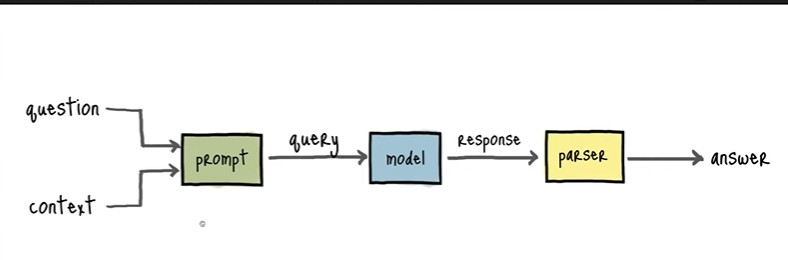

In [ ]:
from PIL import Image
Image.open(r'/content/flow.jpg')

In [ ]:
chain=prompt| model | parser
chain.invoke({"context":"Sai sister is susana",question:"who is Sai's sister"})

In [ ]:
## combining chains

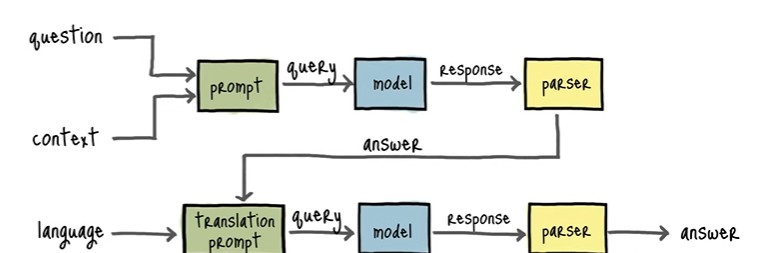

In [ ]:
Image.open(r'/content/chains_combining.jpg')

In [ ]:
from operator import itemgetter
translation_chain=itemgetter("question") | model | parser
translation_chain.invoke({"context":"Sai sister is susana",question:"who is Sai's sister","language":"english"})

In [ ]:
## Transcribing the Youtube Video

In [ ]:
import tempfile
import whisper
from pytube import YouTube

In [ ]:
## using the entire transaction as context

In [ ]:
try:
  chain.invoke("context":,"question":"")
except Exception as e:
  print("error)


In [ ]:
## split the transcription

In [ ]:
from langchain_community.document_loaders import TextLoader
loader=TextLoader("data.txt")
text_documents=loader.load()
text_documents

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter=CharacterTextSplitter(chunk_size=1000,chunk_overlap=0)
docs=text_splitter.split_documents(text_documents)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=0)
docs=text_splitter.split_documents(text_documents)

In [ ]:
## Find relevant chuncks

In [ ]:
Image.open(r'Image_embeddings.png')

In [ ]:
from IPython.terminal.embed import embed
from langchain_openai.embeddings import OpenAIEmbeddings
embeddings=OpenAIEmbeddings()
embedded_query=embeddings.embed_query("what is the meaning of life")
print(f"Embedding_length":{len(embedded_query)})
print(embed)

In [ ]:
## To illusturate how embeddings work

In [ ]:
sentence1=embeddings.embed_query("I am eating an apple")
sentence2=embeddings.embed_query("I am eating a banana")

In [ ]:
## compute the similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([sentence1],[sentence2])


In [ ]:
## setting up a vector store

In [ ]:
## To undesrstand how a vector store wokrs, let us create one in memory and add a few embeddings

In [ ]:
from langchain_community.vectrostores import DocArrayInMemorySearch
vectorstore=DocArrayInMemorySearch.from_texts(["Sais brother is XXX","Sai has two siblings","Sai drive Hyndai"],embedding=embeddings)



In [ ]:
## query to find the most similar embeddings

In [ ]:
vectorstore.similarity_search("who is Sai's brother",k=2)

In [ ]:
## we can retrieve directly from vectorstore

In [ ]:
retriever1=vectorstore.as_retriever()
retriever1.invoke("who is Sai's brother")

In [ ]:
## Our Prompt expects two parameters context and question. we can use the retriver to find the chuncks we will use as the context to answer those questions

In [ ]:
from  langchain_core.runnables import RunableParallel,RunablePassThrough
setup=RunableParallel(context=retriever1,question=RunablePassThrough())
chain=setup | prompt | model | parser
chain.invoke({"topic":"what NBA Team won most matches in 2024"})

In [ ]:
## Let invoke chain using  another example

In [ ]:
chain.invoke({"topic":"who is Sai's brother"})
#

In [ ]:
## LOading the transcription into the vectorstore

In [ ]:
len(documents)

In [ ]:
vectorstore2=DocArrayInMemorySearch.from_documents(documents,embeddings)

In [ ]:
## newchain using the correct vector store

In [ ]:
chain=({"context":vectorstore2.as_retriever(),"question":RunablePassThrough()}) | prompt | model | parser
chain.invoke({"topic":"what NBA Team won most matches in 2024"})

In [ ]:
## setting up pinecone. So far we used the vector store and now we are using Pinecone

In [ ]:
from langchain_pinecone import PineConeVectorstore
index_name="youtube-index"
pinecone=PineConeVectorstore(documents,index_name=index_name,embedding=embeddings)

In [ ]:
pinecone.similarity_search("what NBA Team won most matches in 2024",k=2)[:3]

In [ ]:
## setting up a new chain using the pinecone

In [ ]:
chain=({"context":pinecone.as_retriever(),"question":RunablePassThrough()}) | prompt | model | parser
chain.invoke({"topic":"what NBA Team won most matches in 2024"})